<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 15

# Today's Lecture

1. Radial Basis Function Networks (RBFNs)
2. When to use RBFNs
3. Training an RBF Network

# Introduction

An RBFN performs classification by measuring the input’s similarity to examples from the training set. Each RBFN neuron stores a “prototype”, which is just one of the examples from the training set. When we want to classify a new input, each neuron computes the Euclidean distance between the input and its prototype.If the input more closely resembles the class A prototypes than the class B prototypes, it is classified as class A.

# Architecture

1. The input layer transmits from the data to the hidden layer. No computation is performed in the input layer (just like the feed-forward network).

2. The computations in the hidden layers is based on a comparison with a prototype vectors. Every hidden unit has a prototype vector.Each RBF neuron compares the input vector to its prototype, and outputs a value between 0 and 1 which is a measure of similarity. If the input is equal to the prototype, then the output of that RBF neuron will be 1. As the distance between the input and prototype grows, the response falls off exponentially towards 0.  The shape of the RBF neuron’s response is a bell curve, as illustrated in the network architecture diagram.The neuron’s response value is also called its “activation” value.The prototype vector is also often called the neuron’s “center”, since it’s the value at the center of the bell curve.

3. The output of the network consists of a set of nodes, one per category that we are trying to classify. Each output node computes a sort of score for the associated category. Typically, a classification decision is made by assigning the input to the category with the highest score.

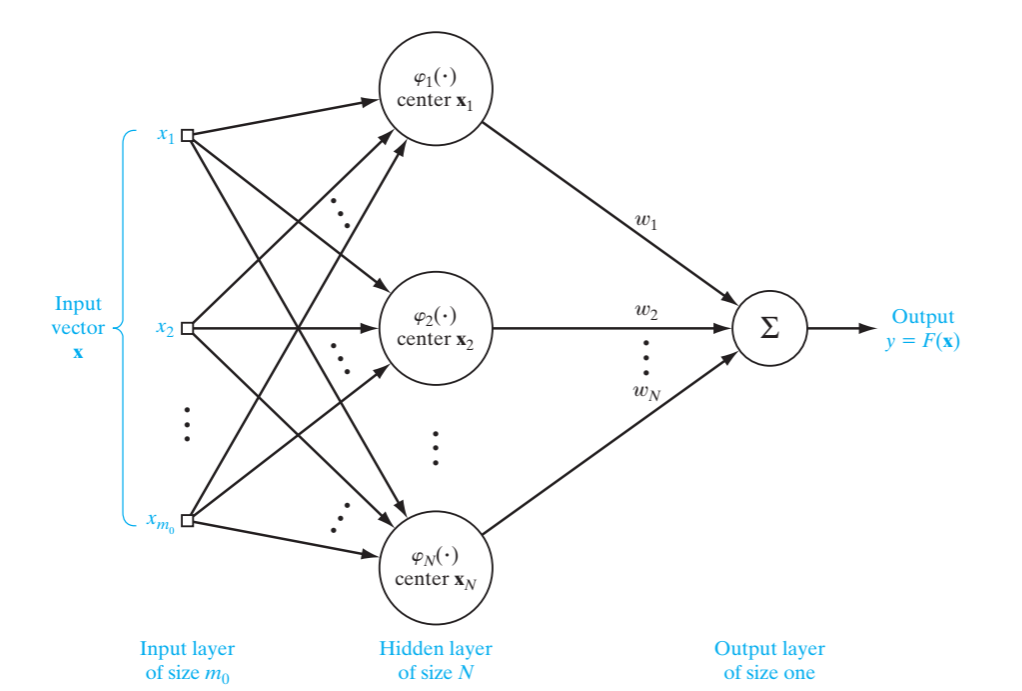

# RBF Neuron Activation

Each RBF neuron computes a measure of the similarity between the input and its prototype vector (taken from the training set). Input vectors which are more similar to the prototype return a result closer to 1. There are different possible choices of similarity functions, but the most popular is based on the Gaussian.

Each RBF neuron will produce its largest response when the input is equal to the prototype vector. This allows to take it as a measure of similarity, and sum the results from all of the RBF neurons.

# Training an RBF Network

Training an RBF is done in an unsupervised manner. 

## Training the hidden layer

The hidden layer of the RBF network contains several parameters, including the prototype vectors and bandwidths. The hyperparameter $m$ controls the number of hidden units.

In practice all units have the same value for bandwidth. However, the mean values are different because these define the prototype vectors.

The complexity of the model is regulated by the number of hidden units and the bandwidth. With larger datasets, a smaller bandwidth is combined with large number of hidden nodes.With smaller datasets its the opposite to avoid overfitting. Bandwidth should be set in such a way that each point is influenced by a small number of prototype vectors which correspond to its closest cluster. Setting the bandwidth too large or too small with respect to the inter-prototype distance will lead to underfitting or overfitting respectively.

Selecting the prototype vector:

1. Randomly sample from $n$ datapoints. One issue with this approach is the over-representation of prototypes from the dense regions.

2. A k-means clustering algorithm can be used to create clusters. The centroids of each of these clusters can be used as prototype. This is a common choice in practice.

3. Decision trees that partition the input space can be used to create prototypes.

4. Orthogonal least squares Algorithm: This approach involves supervision. The prototype vectors are selected one by one from the trainign data in order to minimize the residual error of prediction on an out-of-sample test set.

## Training the Output Layer

The final set of parameters to train are the output weights. These can be trained using gradient descent (also known as least mean squares).

First, for every data point in your training set, compute the activation values of the RBF neurons. These activation values become the training inputs to gradient descent.

Gradient descent must be run separately for each output node (that is, for each class in your data set).

[Ways to Train an RBF](https://sci2s.ugr.es/keel/pdf/specific/articulo/skg01.pdf)

# When to use RBF Networks

Hidden layer of the RBF is created in an unsupervised manner therefore making it robust to all types of noise.

Feed-forward networks learn a more richer structure specifically for problems in computer vision and text related learning. With a single layer in RBF, the primary focus is to learn similarity.

# Orthogonal least Squares Algorithm

The algorithm starts by building an RBF network with a single hidden node and trying each possible training point as a prototype in order to compute the prediction error. Final selection is made based on the point that minimizes prediction error.

In the next iteration another prototype is added by selecting one from the remaining training examples. All $n-1$ training points are tried such that the prediction error is minimized.

In the $r+1$th iteration one tries all $n-r$ remaining points and adds one of them as a prototype. Some of the training points are held out in order to test the effect of adding a prototype to the error. An increase in the error of the held-out set indicates that further increase in prototypes will increase overfitting. At this point the algorithm is terminated.

The main problem with this approach is that its very in-efficient. To make this process efficient a set of orthogonal vectors are constructed in the space spanned by hidden unit activations from the training dataset. These orthogonal vectors can be directly used to compute which prototype should be selected from the training dataset.

## Fully Supervised learning

The orthogonal least square algorithm presents a form of mild supervision in which prototype vectors are selected from one of the trainign points based on their effect to prediction error. Stronger supervision involving backpropogation to update prototype vectors and bandwidth can also be done.

Drawbacks:

1. Extremely inefficient

2. Loss surface of RBFs has many local minima. This approach can lead to local minima and bad generalization.

# Applications

### Linear Separability

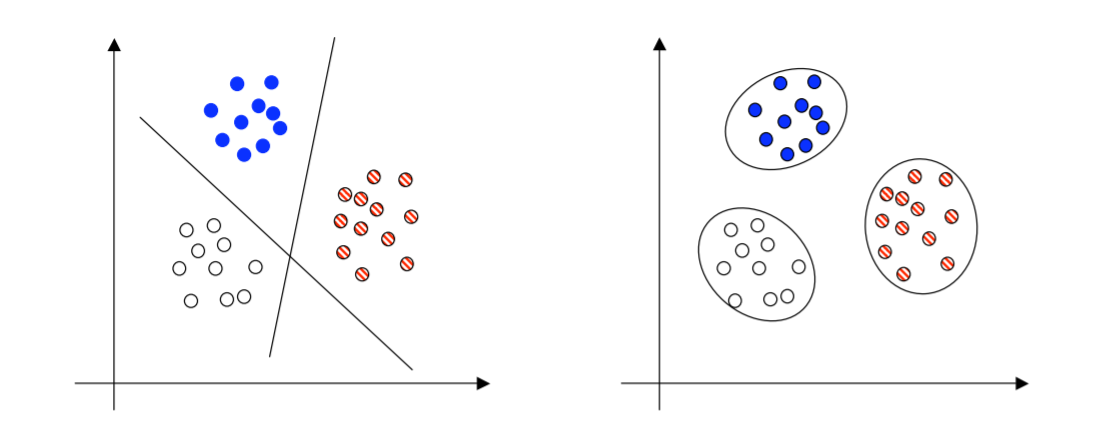

## Interpolation

We can view interpolation as a special case of regression in which each training point is a prototype and therefore the number of weights is exactly equal to the number of training examples.


[Source 1](https://core.ac.uk/download/pdf/37320748.pdf)

[Source 2](https://en.wikipedia.org/wiki/Radial_basis_function_interpolation)

# References/Readings
[Paper 1](https://publications.aston.ac.uk/id/eprint/1060/1/00193.pdf)

[Paper 2](https://drum.lib.umd.edu/bitstream/handle/1903/415/CS-TR-3304.pdf?sequence=2)

[Article 1](https://mccormickml.com/2013/08/15/radial-basis-function-network-rbfn-tutorial/)

[Implementation](https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/)